In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 一、分类散点图
stripplot()：catplot(kind="strip")，默认的。

swarmplot()：catplot(kind="swarm")。点更分散看更清楚

要想绘制横向散点图，只需要将x与y调换位置即可

In [3]:
tips = pd.read_csv("dataset/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


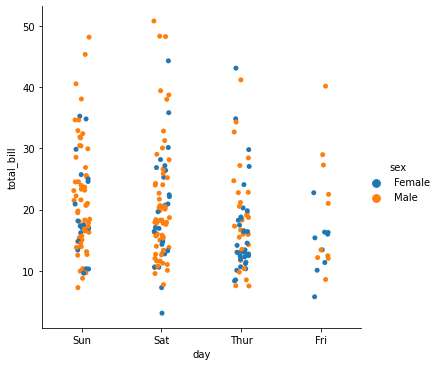

In [6]:
sns.catplot(x="day",y="total_bill",data=tips,hue="sex")

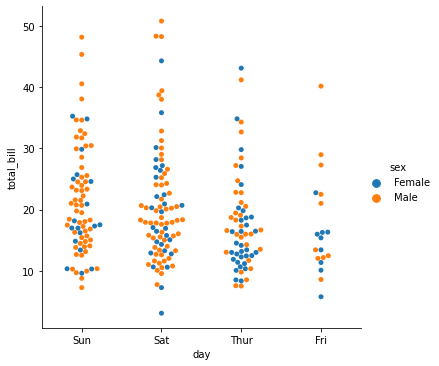

In [7]:
sns.catplot(x="day",y="total_bill",data=tips,hue="sex",kind="swarm")

#  二、分类分布图-箱线图和小提琴图
boxplot(): catplot(kind="box")

violinplot(): catplot(kind="vinlin")

In [19]:
athletes = pd.read_csv("athlete_events.csv")
countries = {
    'CHN':'中国',
    'JPN':"日本",
    'KOR':'韩国',
    'USA':"美国",
    'CAN':"加拿大",
    'BRA':"巴西",
    'GBR':"英国",
    'FRA':"法国",
    'ITA':"意大利",
    'ETH':"埃塞俄比亚",
    'KEN':"肯尼亚",
    'NIG':"尼日利亚",
}
athletes.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


<Figure size 4500x1500 with 0 Axes>

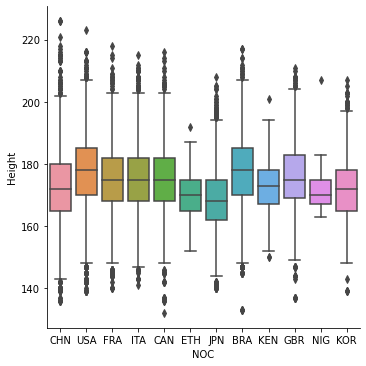

In [22]:
data = athletes[athletes["NOC"].isin(countries)]
data.head(3)
# 箱线图如果用sns.catplot(kind="box"),则不能和matplotlib混用，比如plt.figure()以及plt.xticks()
# 但是箱线图用sns.boxplot()则可以
plt.figure(figsize=(15,5),dpi=300)
sns.catplot(x="NOC", y="Height",data=data,kind="box")

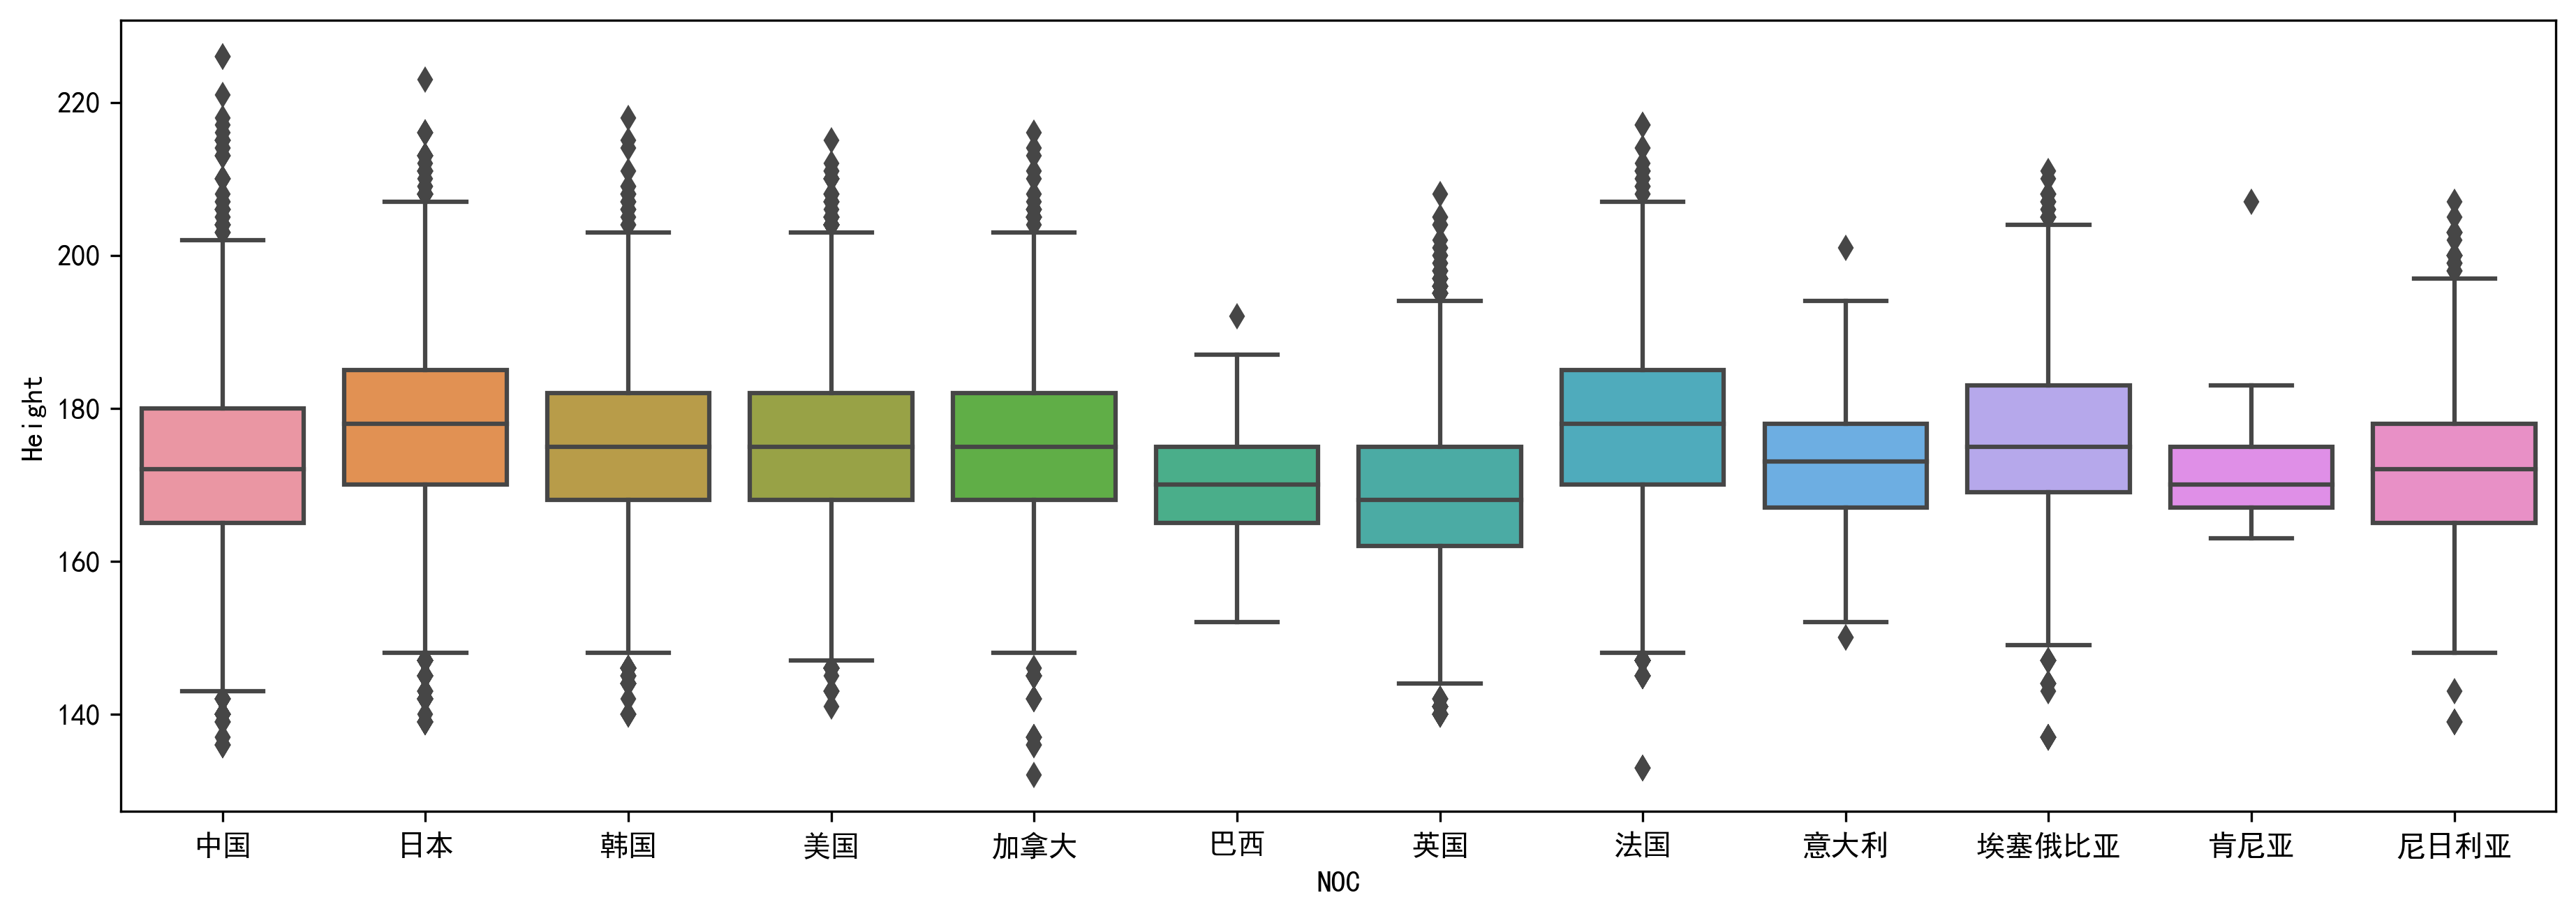

In [30]:
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.figure(figsize=(15,5),dpi=300)
sns.boxplot(x="NOC", y="Height",data=data)
plt.xticks(np.arange(len(countries)),countries.values())
plt.show()

<AxesSubplot:xlabel='day', ylabel='total_bill'>

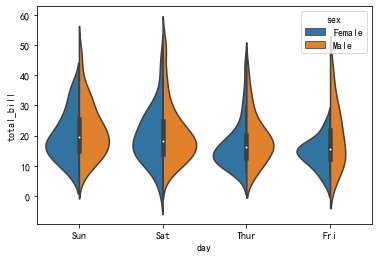

In [34]:
#小提琴图
#inner参数: inner="box"是默认的，除此之外还有quartile(四分位数)，point，stick
sns.violinplot(x="day",y="total_bill",data=tips,hue="sex",split=True)

# 三、分类统计图-条形图，柱形图，电线图
1.条形图：barplot()：catplot(kind="bar")。

2.柱形图：countplot()：catplot(kind="count")。

3.点线图：pointplot()：catplot(kind="point")。

## 条形图

<AxesSubplot:xlabel='day', ylabel='total_bill'>

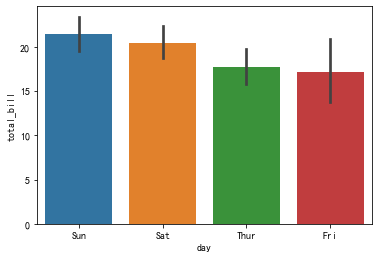

In [35]:
# 1.统计平均数
# 纵坐标代表平均数，黑线代表置信区间
sns.barplot(x="day",y="total_bill",data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

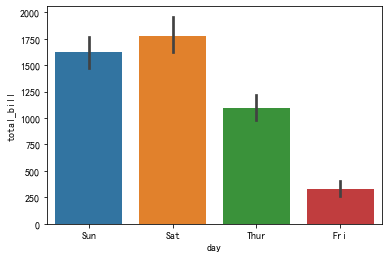

In [54]:
# 2.统计因变量总值
# 纵坐标当前横坐标的对应y轴数据的总和
sns.barplot(x="day",y="total_bill",data=tips,estimator=sum)

<AxesSubplot:xlabel='sex', ylabel='survived'>

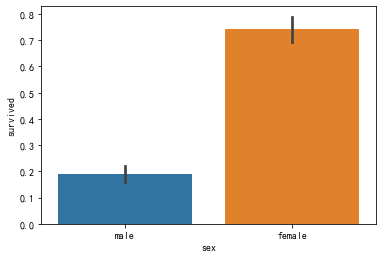

In [40]:
# 3.统计比例
titanic = pd.read_csv("dataset/titanic.csv")
titanic.head()
sns.barplot(x="sex",y="survived",data=titanic)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

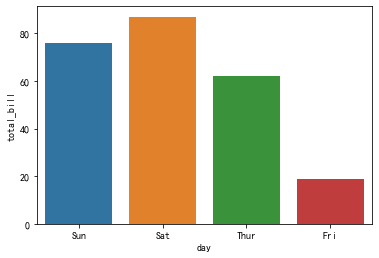

In [56]:
# 4.自定义统计函数
sns.barplot(x="day",y="total_bill",data=tips,estimator=lambda x:len(x))

## 柱状图
用来统计横坐标出现的次数

只能传入一个变量（x or y代表方向）

<AxesSubplot:xlabel='day', ylabel='count'>

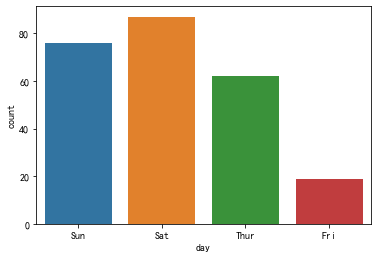

In [53]:
sns.countplot(x="day",data=tips)

<AxesSubplot:xlabel='count', ylabel='day'>

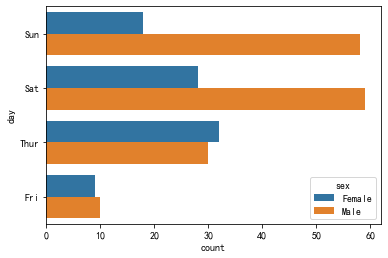

In [57]:
sns.countplot(y="day",data=tips,hue="sex")

## 点线图
sns.pointplot()

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

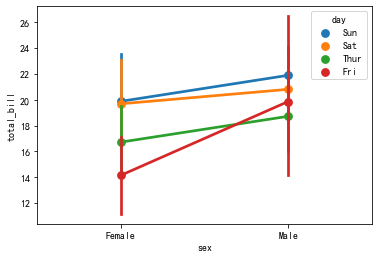

In [60]:
sns.pointplot(x="sex",y="total_bill",data=tips,hue="day")

# 分类图的绘制

## 一、分类散点图：
1. stripplot和swarmplot。
2. swramplot采用了一定的算法，可以让点不会重叠。
3. 分类散点图，特别是swarmplot，不太适合数据量特别大的，否则不太美观。

## 二、分布图：
1. 箱线图：boxplot或者是catplot(kind="box")。然后使用hue参数可以进行分组。
2. 小提琴图：violinplot或者是catplot(kind="violin")。小提琴图是由KDE曲线（核密度估计曲线）绘制而成。inner参数可以控制小提琴中的图，可以为box,quartile,stick,point。可以使用hue参数来进行分组，并且可以指定split=True，来将整个小提琴分割开来进行展示。

## 三、统计图：
1. 条形图：barplot，他会自动进行统计（平均数、比例等），也可以通过`estimator`参数来修改统计函数。
2. 柱状图：countplot，只能统计某个变量数据的个数。x和y只能传一个。
3. 点线图：pointplot，可以看出某个变量的变化关系。